# Basic test
Tests the basic model defined in the `ContinuousModel` directory, instantiating bees, hives and resources

In [5]:
# Allows to make changes to the classes without restarting the notebook 💀 # TODO: Delete once done
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from ContinuousModel.Bee import Bee
from ContinuousModel.Hive import Hive
from ContinuousModel.Model import Model
from ContinuousModel.Resource import Resource

In [7]:
import mesa
import matplotlib.pyplot as plt

## Instantiate model

In [55]:
model = Model(SIZE=10)

# Create a beehive
HIVE = model.create_agent(Hive, location=(0,0))

model.create_agent(Bee, hive=HIVE,location=HIVE.location)
model.create_agent(Bee, hive=HIVE,location=HIVE.location)
model.create_agent(Bee, hive=HIVE,location=HIVE.location)
model.create_agent(Resource, location=(3,3))

In [60]:
model.step()

## Plot scenario

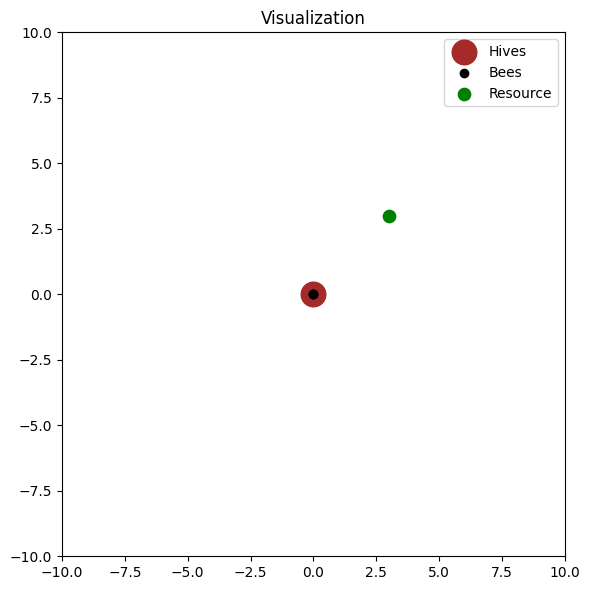

In [61]:
# TODO: A potential starting point 
# https://github.com/projectmesa/mesa-examples/blob/main/examples/boid_flockers/boid_flockers/SimpleContinuousModule.py


# Create canvas
fig, ax = plt.subplots(dpi=100,figsize=(6,6))

# Set limits of space based on model parameter
ax.set_xlim([-model.size,model.size])
ax.set_ylim([-model.size,model.size])

# Get agents of each type
agents = model.agents
bees = [agent for agent in agents if isinstance(agent, Bee)]
hives = [agent for agent in agents if isinstance(agent, Hive)]
resources = [agent for agent in agents if isinstance(agent, Resource)]

# Plot hives
for hive in hives:
    ax.scatter(hive.location[0],hive.location[1],c='brown',s=3.14*hive.radius**2,label='Hives')

# Plot bees
for bee in bees:
    # Add text indicating their state (0,1,2,3,4)
    ax.scatter(bee.location[0],bee.location[1],c='black',label='Bees')

for resource in resources:
    # TODO: Plot resource scent
    ax.scatter(resource.location[0],resource.location[1],c='green',s=3.14*resource.radius**2,label='Resource')


# Show legend but avoid repeating labels (so there is only one per bee)
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.title('Visualization')
plt.tight_layout()
#plt.grid()